### Documentação da analise de dados da Binance

Nesse documento foi realizado a analise de dados utilizando a API da Binance

#### Foram realizados as prinscipais analises:
###### 1º Importar as Bibliotecas Necessárias
###### 2º Obter Dados Históricos da Binance
###### 3º Análise Exploratória Básica com Pandas
###### 4º Análise Gráfica  
###### 5º Análise de Volume
###### 6º Análise de Volume
###### 7º Análise de Ordem e Profundidade do Mercado
###### 8º Backtesting Simples de Estratégias

In [52]:
import pandas as pd
import numpy as np
import vectorbt as vbt
import matplotlib.pyplot as plt

In [53]:
# Definir o par de criptomoeda e o intervalo de tempo
symbol = 'BTCUSDT'  # Exemplo: Bitcoin vs USDT
interval = '1h'     # Intervalo de 1 hora


# Baixar os dados históricos de preço (OHLCV) da Binance
data = vbt.BinanceData.download(symbol, interval=interval, start='2024-08-01', end='2024-09-01')

# Transformando os dados da Binance em um DataFrame 
df = data.get()

0it [00:00, ?it/s]

In [54]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote volume',
       'Number of trades', 'Taker base volume', 'Taker quote volume'],
      dtype='object')

In [55]:
df.head()

,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume
Open time,,,,,,,,,,
2024-08-01 03:00:00+00:00,64110.00,64139.82,63750.00,63936.01,1273.19128,2024-08-01 03:59:59.999000+00:00,8.140649e+07,73796,555.07645,3.550012e+07
2024-08-01 04:00:00+00:00,63936.01,64058.00,63613.33,63740.41,1258.10705,2024-08-01 04:59:59.999000+00:00,8.029289e+07,85198,492.73639,3.145494e+07
2024-08-01 05:00:00+00:00,63740.41,64357.38,63584.00,64303.99,1574.31338,2024-08-01 05:59:59.999000+00:00,1.007703e+08,85065,868.65525,5.562495e+07
2024-08-01 06:00:00+00:00,64304.00,64454.00,64124.00,64226.00,767.67304,2024-08-01 06:59:59.999000+00:00,4.933767e+07,53255,356.38263,2.290482e+07
2024-08-01 07:00:00+00:00,64226.00,64488.00,64216.71,64328.59,507.42839,2024-08-01 07:59:59.999000+00:00,3.266160e+07,51154,271.57935,1.748104e+07


In [56]:
df.describe()

,Open,High,Low,Close,Volume,Quote volume,Number of trades,Taker base volume,Taker quote volume
count,744.000000,744.000000,744.000000,744.000000,744.000000,7.440000e+02,744.000000,744.000000,7.440000e+02
mean,60045.095444,60304.401277,59755.715457,60037.602930,1354.398321,7.961167e+07,91819.689516,658.238457,3.871021e+07
std,2499.574285,2428.988417,2590.266629,2495.705077,1635.386321,8.919840e+07,78984.457860,779.697664,4.273106e+07
min,49804.010000,51542.000000,49000.000000,49804.000000,163.547540,9.744392e+06,17951.000000,73.562500,4.361987e+06
25%,58954.022500,59155.750000,58624.502500,58949.812500,527.279638,3.224741e+07,43411.500000,252.400130,1.509582e+07
50%,59680.890000,59943.380000,59427.535000,59675.970000,875.165930,5.202317e+07,67112.000000,432.669475,2.609592e+07
75%,61120.002500,61382.362500,60896.782500,61119.990000,1618.274655,9.585318e+07,113946.000000,783.586407,4.610063e+07
max,65354.020000,65659.780000,65000.000000,65354.020000,20888.722870,1.064461e+09,728327.000000,9081.232770,4.630318e+08


In [57]:
df.isnull().sum()

Open                  0
High                  0
Low                   0
Close                 0
Volume                0
Close time            0
Quote volume          0
Number of trades      0
Taker base volume     0
Taker quote volume    0
dtype: int64

In [58]:
df.corr()

,Open,High,Low,Close,Volume,Close time,Quote volume,Number of trades,Taker base volume,Taker quote volume
Open,1.000000,0.992608,0.990000,0.985834,-0.391233,0.185971,-0.352999,-0.332601,-0.403681,-0.363856
High,0.992608,1.000000,0.986408,0.993003,-0.347810,0.168171,-0.307234,-0.286852,-0.349913,-0.307291
Low,0.990000,0.986408,1.000000,0.992417,-0.474715,0.209832,-0.438687,-0.414614,-0.476619,-0.438209
Close,0.985834,0.993003,0.992417,1.000000,-0.407989,0.188656,-0.370144,-0.349581,-0.404988,-0.364529
Volume,-0.391233,-0.347810,-0.474715,-0.407989,1.000000,-0.252733,0.996599,0.920977,0.991353,0.985026
Close time,0.185971,0.168171,0.209832,0.188656,-0.252733,1.000000,-0.252322,-0.101813,-0.255691,-0.253961
Quote volume,-0.352999,-0.307234,-0.438687,-0.370144,0.996599,-0.252322,1.000000,0.931962,0.989733,0.990262
Number of trades,-0.332601,-0.286852,-0.414614,-0.349581,0.920977,-0.101813,0.931962,1.000000,0.917438,0.925181
Taker base volume,-0.403681,-0.349913,-0.476619,-0.404988,0.991353,-0.255691,0.989733,0.917438,1.000000,0.996471
Taker quote volume,-0.363856,-0.307291,-0.438209,-0.364529,0.985026,-0.253961,0.990262,0.925181,0.996471,1.000000


In [59]:
df['Close'].vbt.plot()

FigureWidget({
    'data': [{'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'ffd8fd1b-7403-4e6a-8186-14a7be96a9cd',
              'x': array([datetime.datetime(2024, 8, 1, 3, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 8, 1, 4, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 8, 1, 5, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2024, 9, 1, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 9, 1, 1, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 9, 1, 2, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([63936.01, 63740.41, 64303.99, ..., 58930.  , 58828.01, 58540.25])}],
    'layout': {'height': 350,
               'legend': {'orientation': 'h',
                          'traceorder': 'normal',
 

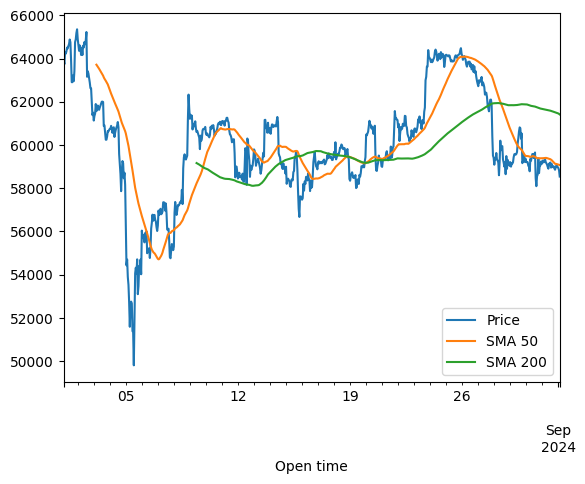

In [60]:
# Cálculo das médias móveis com Pandas
sma_50 = df['Close'].rolling(window=50).mean()
sma_200 = df['Close'].rolling(window=200).mean()

# Plotando as médias móveis
fig = df['Close'].plot(label='Price')
sma_50.plot(label='SMA 50', ax=fig)
sma_200.plot(label='SMA 200', ax=fig)
plt.legend()
plt.show()


In [61]:
# Volatilidade baseada no retorno logarítmico
df['Returns'] = df['Close'].pct_change()
df['Volatility'] = df['Returns'].rolling(window=20).std()

# Plotando a volatilidade
df['Volatility'].vbt.plot()

FigureWidget({
    'data': [{'name': 'Volatility',
              'showlegend': True,
              'type': 'scatter',
              'uid': '64ad292c-93ab-4331-8cb2-ee74f8538cd5',
              'x': array([datetime.datetime(2024, 8, 1, 3, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 8, 1, 4, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 8, 1, 5, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2024, 9, 1, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 9, 1, 1, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 9, 1, 2, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([       nan,        nan,        nan, ..., 0.00189229, 0.00186414,
                          0.00212376])}],
    'layout': {'height': 350,
               'legend': {'orientation': 'h',
        

In [62]:
df['Volume'].vbt.plot()

FigureWidget({
    'data': [{'name': 'Volume',
              'showlegend': True,
              'type': 'scatter',
              'uid': 'ff6be182-d553-4faf-80b3-536268e29245',
              'x': array([datetime.datetime(2024, 8, 1, 3, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 8, 1, 4, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 8, 1, 5, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2024, 9, 1, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 9, 1, 1, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 9, 1, 2, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'y': array([1273.19128, 1258.10705, 1574.31338, ...,  289.12701,  330.21542,
                          1256.77642])}],
    'layout': {'height': 350,
               'legend': {'orientation': 'h',
            

In [63]:
entries = sma_50 > sma_200  # Sinal de compra
exits = sma_50 < sma_200  # Sinal de venda

# Simulação de backtest
portfolio = vbt.Portfolio.from_signals(df['Close'], entries, exits)
portfolio.plot()


FigureWidget({
    'data': [{'legendgroup': '0',
              'line': {'color': '#1f77b4'},
              'name': 'Close',
              'showlegend': True,
              'type': 'scatter',
              'uid': '2080eb31-451f-4e8c-93f6-10395a7c2e16',
              'x': array([datetime.datetime(2024, 8, 1, 3, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 8, 1, 4, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 8, 1, 5, 0, tzinfo=datetime.timezone.utc), ...,
                          datetime.datetime(2024, 9, 1, 0, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 9, 1, 1, 0, tzinfo=datetime.timezone.utc),
                          datetime.datetime(2024, 9, 1, 2, 0, tzinfo=datetime.timezone.utc)],
                         dtype=object),
              'xaxis': 'x',
              'y': array([63936.01, 63740.41, 64303.99, ..., 58930.  , 58828.01, 58540.25]),
              'yaxis': 